<a href="https://colab.research.google.com/github/HubAstro/Population-analysis/blob/main/Population_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Created by Nishanth Kumar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
data = pd.read_csv("countries-data.csv")

In [ ]:
print(f"Shape Of The Dataset : {data.shape}")
print(f"\nGlimpse Of The Dataset :")
data.head().style.set_properties(**{"background-color": "#F0FFFF","color":"#7393B3","border": "1.5px solid black"})

Shape Of The Dataset : (234, 18)

Glimpse Of The Dataset :


,rank,cca3,country,continent,2024 population,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1450940000,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.000000,481,0.81%,17.85%
1,2,CHN,China,Asia,1419320000,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.000000,151,-0.02%,17.81%
2,3,USA,United States,North America,345427000,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.000000,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,283488000,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.000000,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,251269000,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.000000,312,1.98%,3.00%


In [ ]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2024 population   234 non-null    int64  
 5   2023 population   234 non-null    int64  
 6   2022 population   234 non-null    int64  
 7   2020 population   234 non-null    int64  
 8   2015 population   234 non-null    int64  
 9   2010 population   234 non-null    int64  
 10  2000 population   234 non-null    int64  
 11  1990 population   234 non-null    int64  
 12  1980 population   234 non-null    int64  
 13  1970 population   234 non-null    int64  
 14  area (km²)        234 non-null    float64
 15  density (km²)     234 non-null    int64  
 16  growth rate  

In [ ]:
print(f"Summary Of The Dataset :")
data.describe().style.set_properties(**{"background-color": "#F0FFFF","color":"#7393B3","border": "1.5px solid black"})

Summary Of The Dataset :


,rank,2024 population,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34872885.188034,34374424.743590,34074414.713675,33501070.952991,31729956.243590,29845235.042735,26269468.816239,22710220.790598,18984616.982906,15786908.807692,581449.983590,451.282051
std,67.694165,138347574.730599,137386405.597263,136766424.804728,135589876.924439,130404992.751760,124218487.631581,111698206.719070,97832173.346751,81785186.081872,67795091.643236,1761840.665609,1979.398922
min,1.000000,496.000000,518.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,0.440000,0.000000
25%,59.250000,428484.250000,422598.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,39.500000
50%,117.500000,5615065.000000,5643895.000000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,97.500000
75%,175.750000,23465100.000000,23245367.250000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,242.750000
max,234.000000,1450940000.000000,1428627663.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,21403.000000


In [ ]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#F0FFFF","color":"#7393B3","border": "1.5px solid black"})

,count,unique,top,freq
cca3,234,234,IND,1
country,234,234,India,1
continent,234,6,Africa,57
growth rate,234,176,0.74%,5
world percentage,234,73,0.00%,57


In [ ]:
print(f"Null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#F0FFFF","color":"#7393B3","border": "1.5px solid black"})

Null values of the Dataset :


,rank,cca3,country,continent,2024 population,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


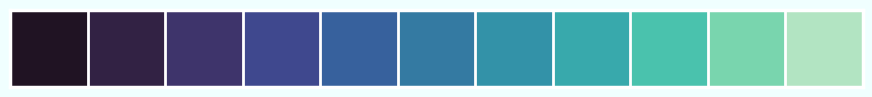

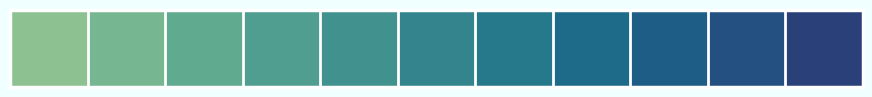

In [ ]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#F0FFFF","figure.facecolor":"#F0FFFF"})
sns.set_context("poster",font_scale = .7)

sns.palplot(sns.color_palette("mako", 11))
sns.palplot(sns.color_palette("crest", 11))
plt.show()

Let's have a look on the population :


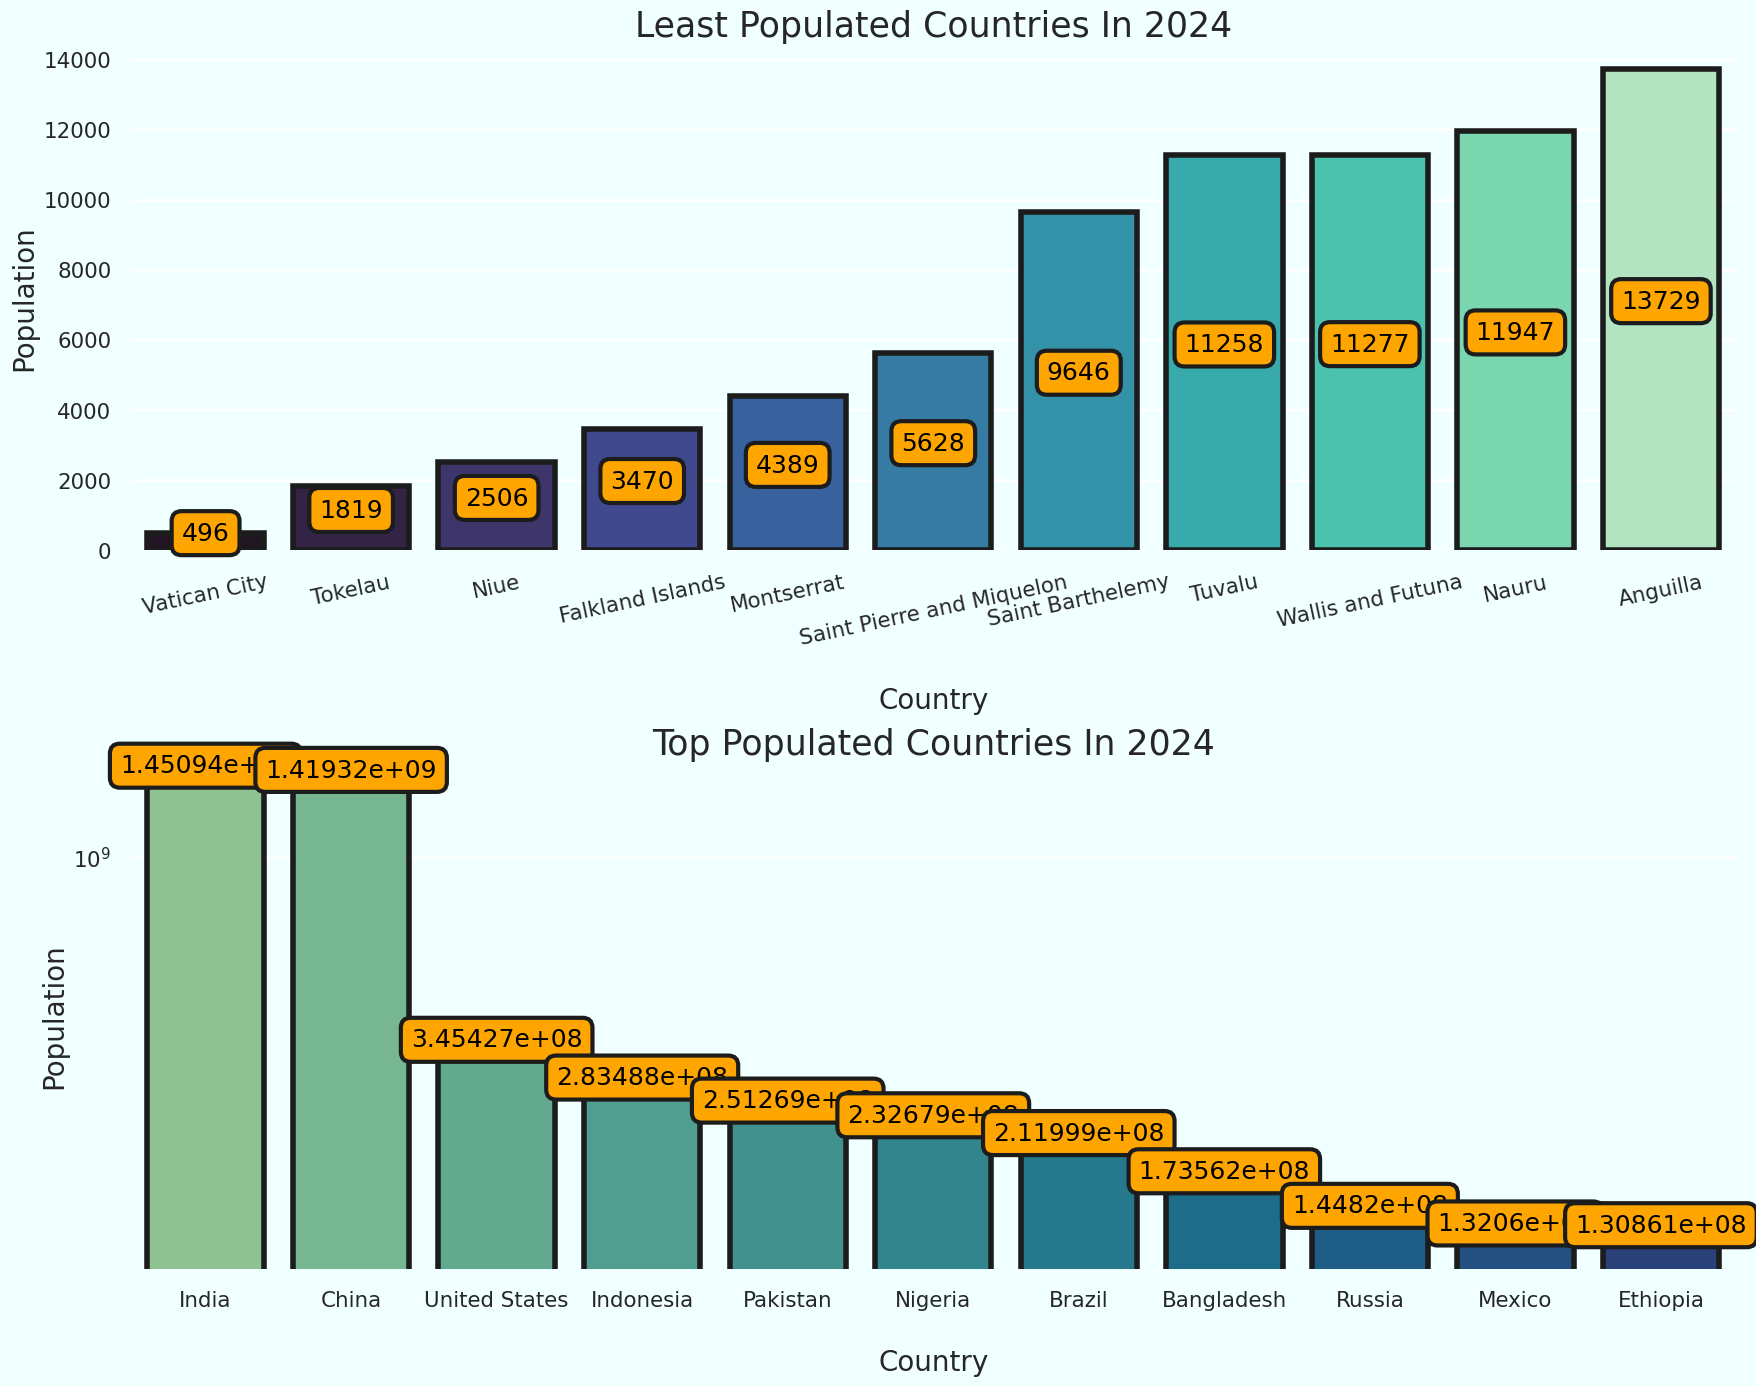

In [ ]:
print(f"Let's have a look on the population :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=7.0)

sns.barplot(x=data["country"],y=data["2024 population"],order=data.sort_values("2024 population",ascending=True)["country"][:11],ax=axs[0],palette=sns.color_palette("mako", 11), saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Least Populated Countries In 2024",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Population",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 12)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})


sns.barplot(x=data["country"],y=data["2024 population"],order=data.sort_values("2024 population",ascending=False)["country"][:11],ax=axs[1],palette=sns.color_palette("crest", 11), saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("log")
axs[1].set_title("Top Populated Countries In 2024",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Population",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 0)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the continent-wise population in 2024 :


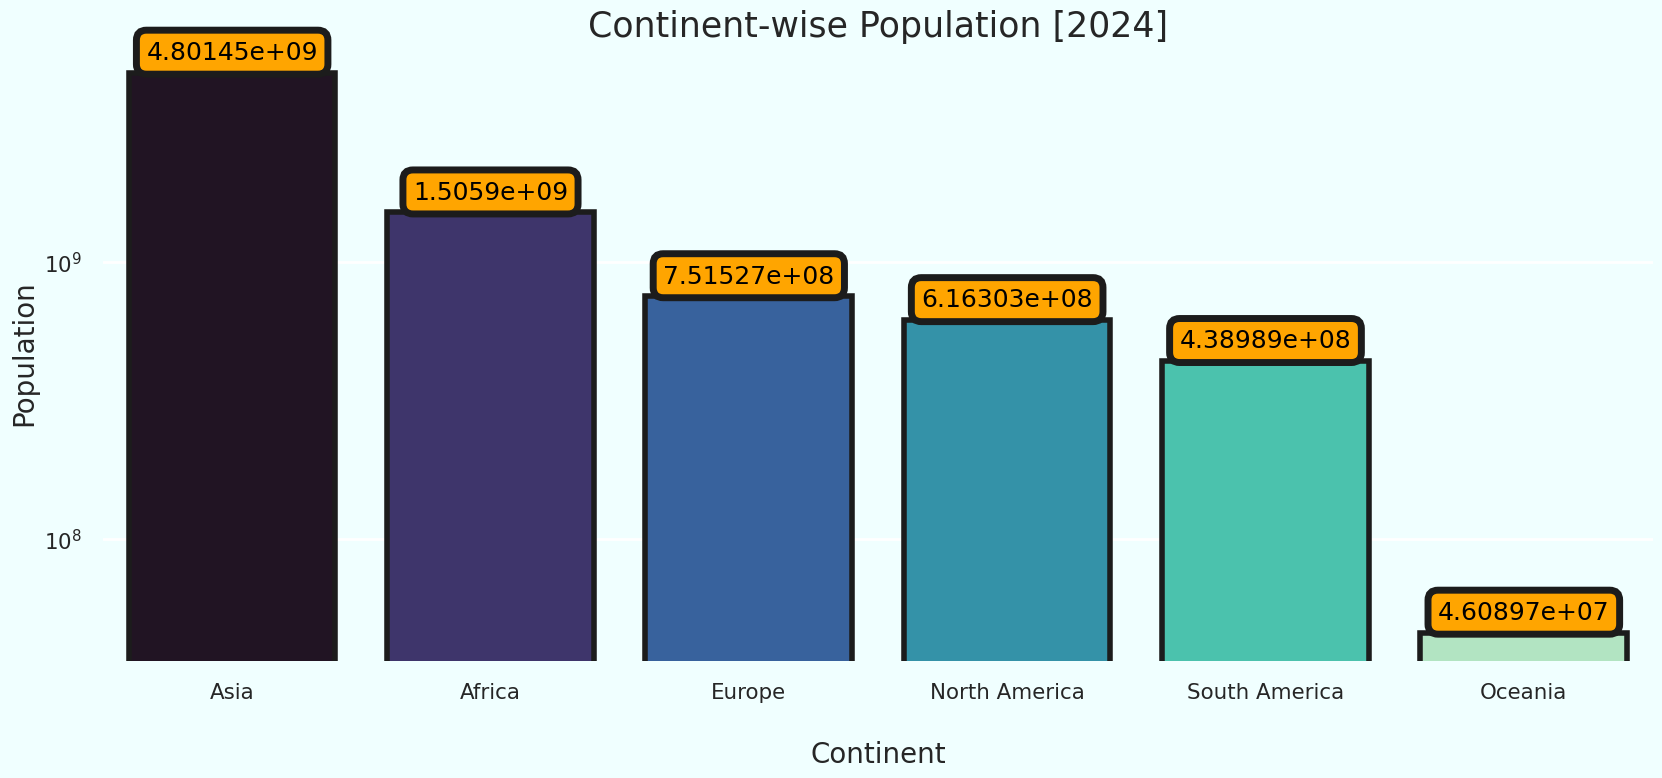

In [ ]:
data_pop = data.copy()
data_pop = pd.DataFrame(data_pop.groupby(["continent"])[["1970 population","1980 population","1990 population","2000 population","2010 population","2015 population","2020 population","2022 population", "2024 population"]].sum())

print("Let's have a look on the continent-wise population in 2024 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(x=data_pop.index, y=data_pop["2024 population"],order=data_pop.sort_values("2024 population",ascending=False).index,palette=sns.color_palette("mako", 11)[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Population [2024]",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the ratios of continent-wise population in 2024 :


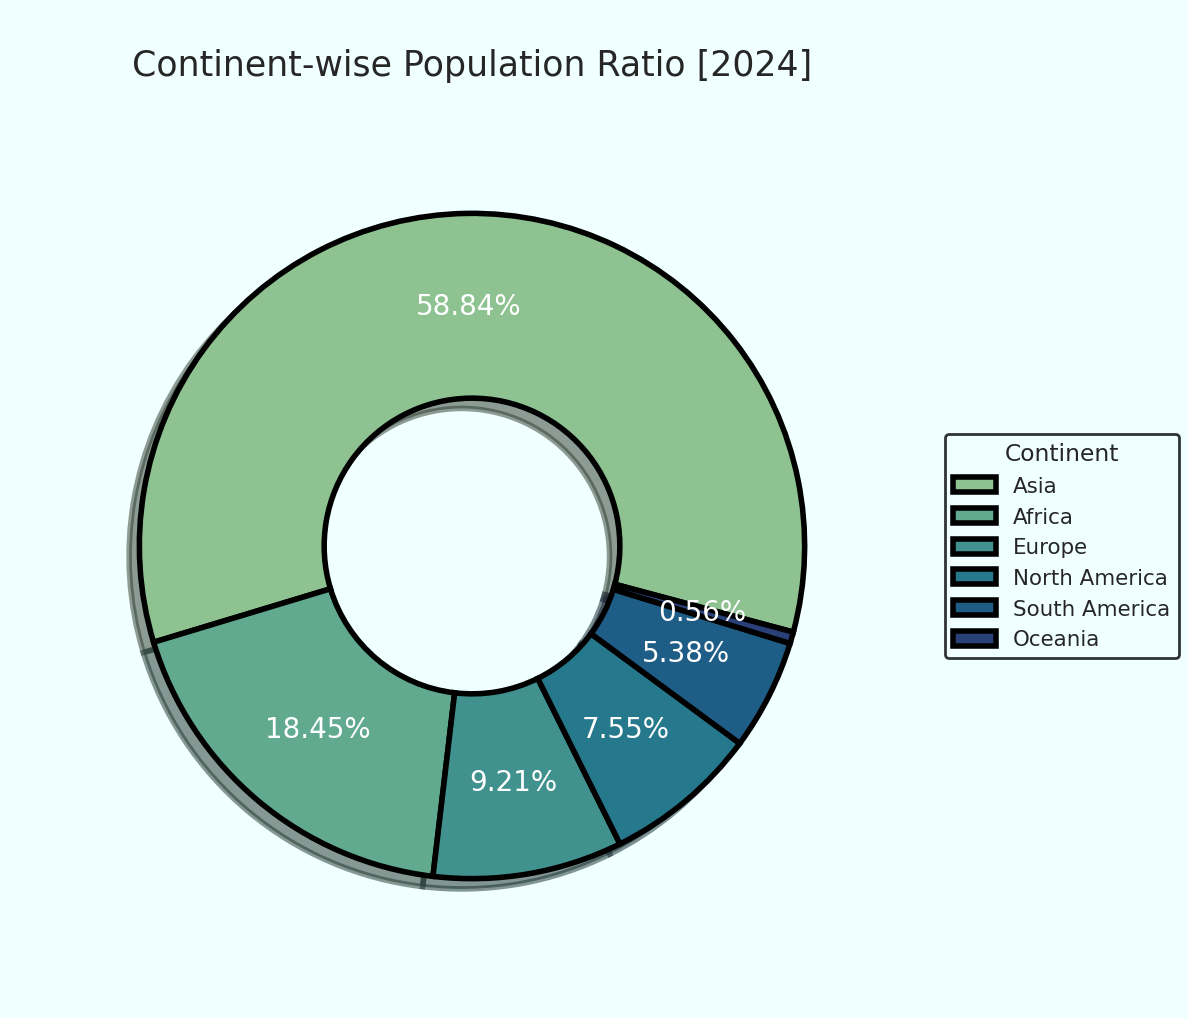

In [ ]:
print(f"Let's have a look on the ratios of continent-wise population in 2024 :")
plt.subplots(figsize=(12, 12))

labels = "Asia","Africa","Europe","North America","South America","Oceania"
size = 0.5

wedges, texts, autotexts = plt.pie([data_pop.sort_values("2024 population",ascending=False)["2024 population"][0],
                                    data_pop.sort_values("2024 population",ascending=False)["2024 population"][1],
                                    data_pop.sort_values("2024 population",ascending=False)["2024 population"][2],
                                    data_pop.sort_values("2024 population",ascending=False)["2024 population"][3],
                                    data_pop.sort_values("2024 population",ascending=False)["2024 population"][4],
                                    data_pop.sort_values("2024 population",ascending=False)["2024 population"][5]],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = sns.color_palette("crest", 11)[0:11:2],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = -15)

plt.legend(wedges, labels, title="Continent",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nContinent-wise Population Ratio [2024]",fontsize=25)
plt.show()

Population in Asia in 2024 :


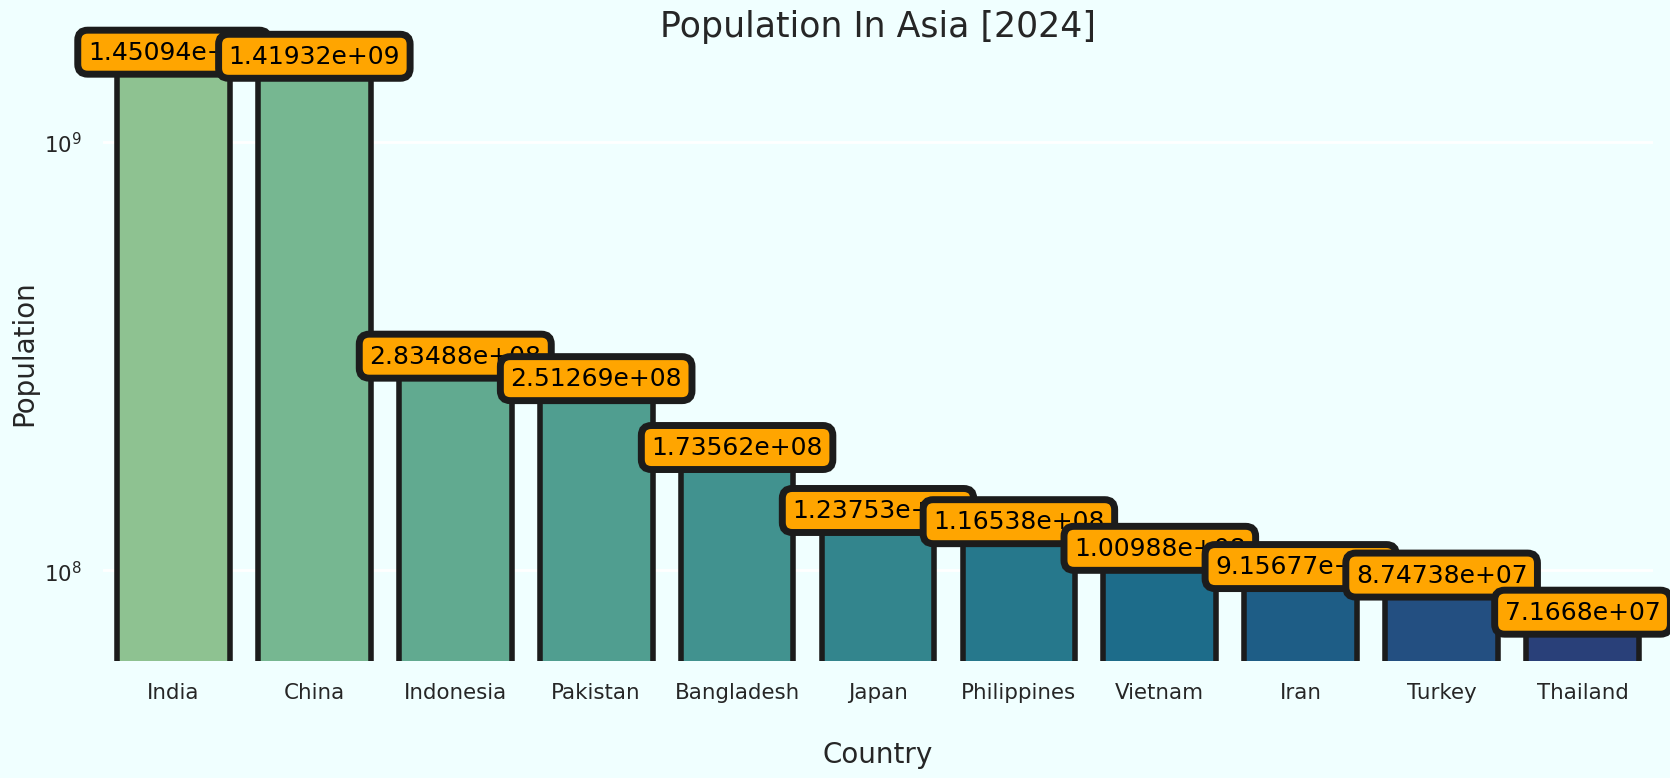

In [ ]:
print("Population in Asia in 2024 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["continent"]=="Asia"],x="country", y="2024 population",order=data[data["continent"]=="Asia"].sort_values("2024 population",ascending=False)["country"][:11],palette=sns.color_palette("crest", 11)[0:11:1], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Asia [2024]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in Africa in 2024 :


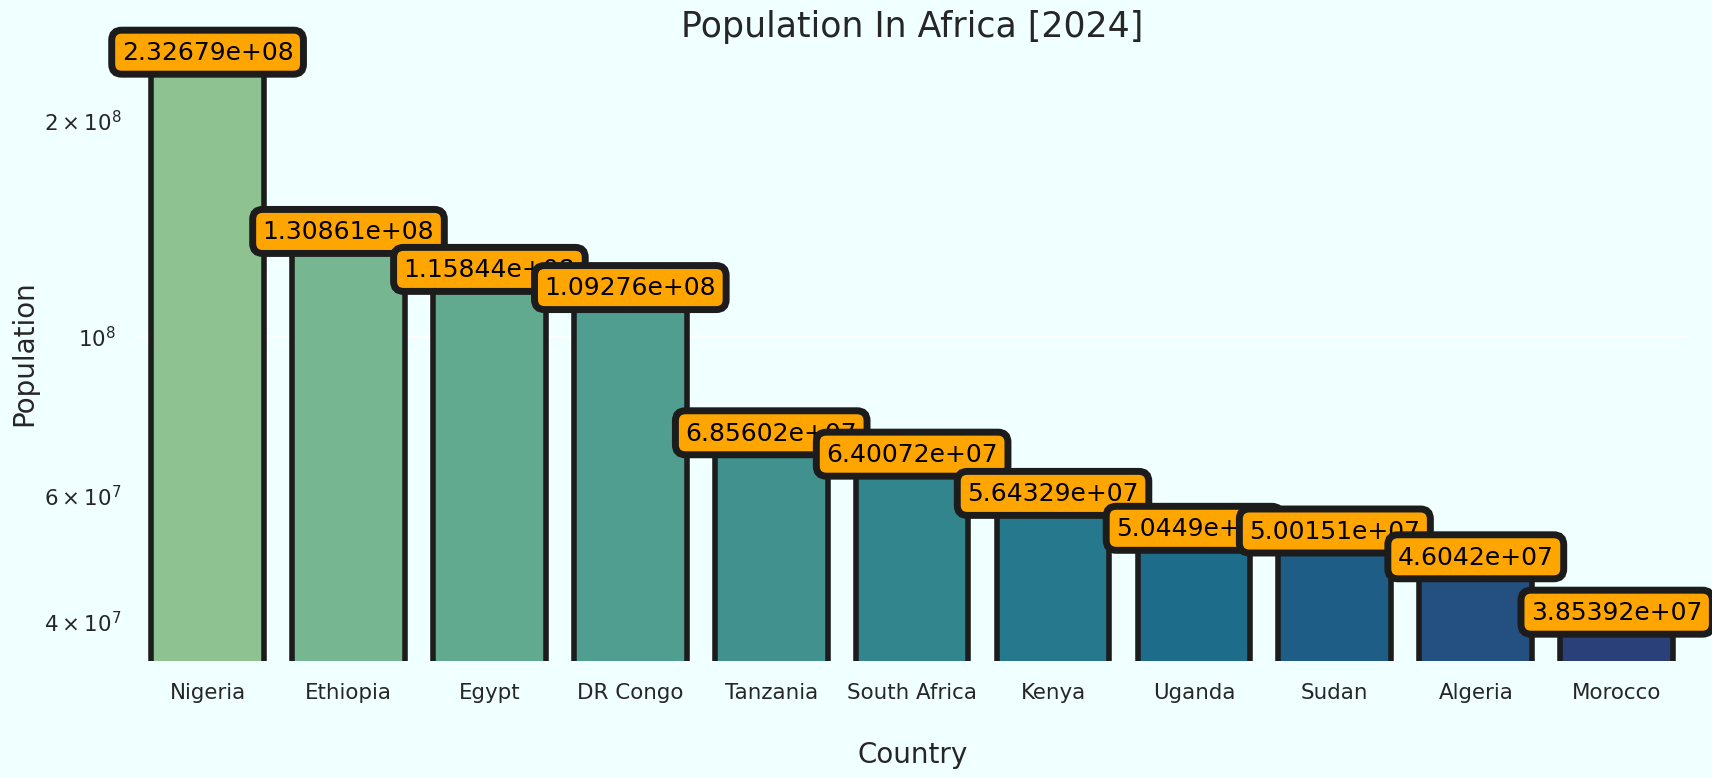

In [ ]:
print("Population in Africa in 2024 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["continent"]=="Africa"],x="country", y="2024 population",order=data[data["continent"]=="Africa"].sort_values("2024 population",ascending=False)["country"][:11],palette=sns.color_palette("crest", 11)[0:11:1], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Africa [2024]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in Europe in 2024 :


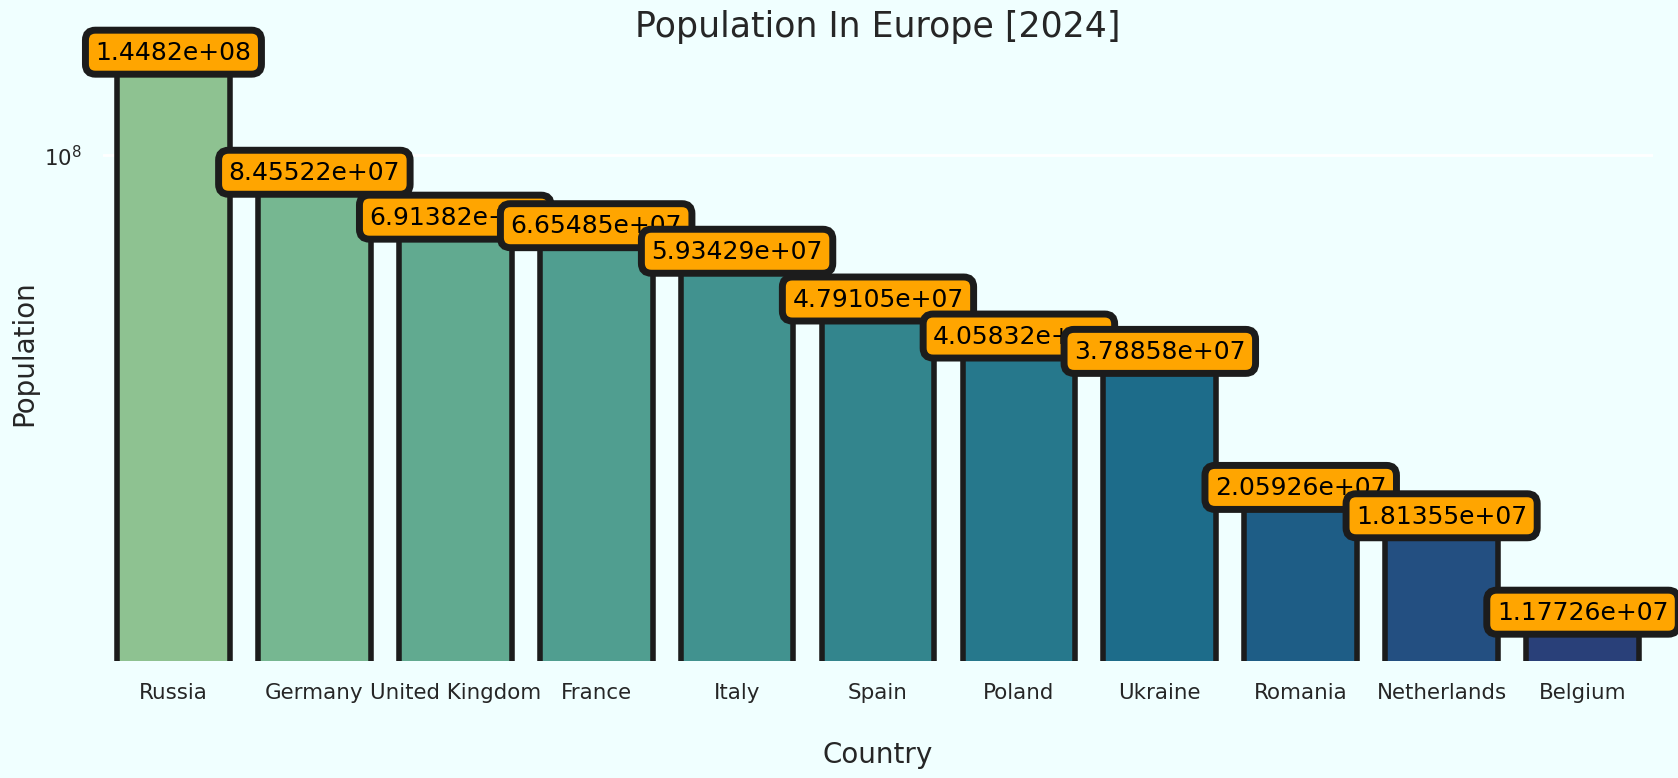

In [ ]:
print("Population in Europe in 2024 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["continent"]=="Europe"],x="country", y="2024 population",order=data[data["continent"]=="Europe"].sort_values("2024 population",ascending=False)["country"][:11],palette=sns.color_palette("crest", 11)[0:11:1], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In Europe [2024]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in North America in 2024 :


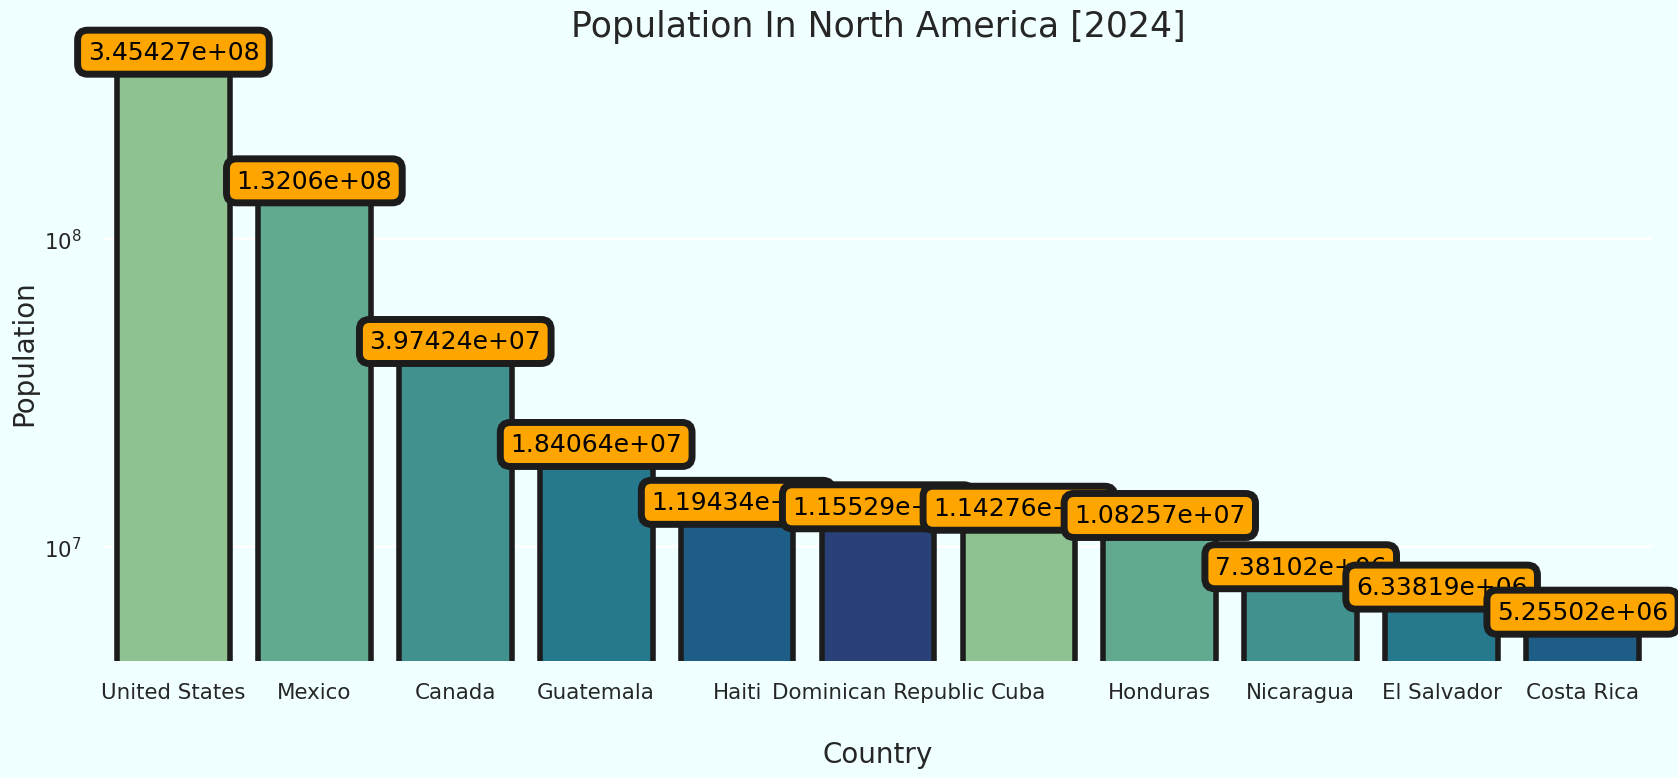

In [ ]:
print("Population in North America in 2024 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["continent"]=="North America"],x="country", y="2024 population",order=data[data["continent"]=="North America"].sort_values("2024 population",ascending=False)["country"][:11],palette=sns.color_palette("crest", 11)[0:11:2], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In North America [2024]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Population in South America in 2024 :


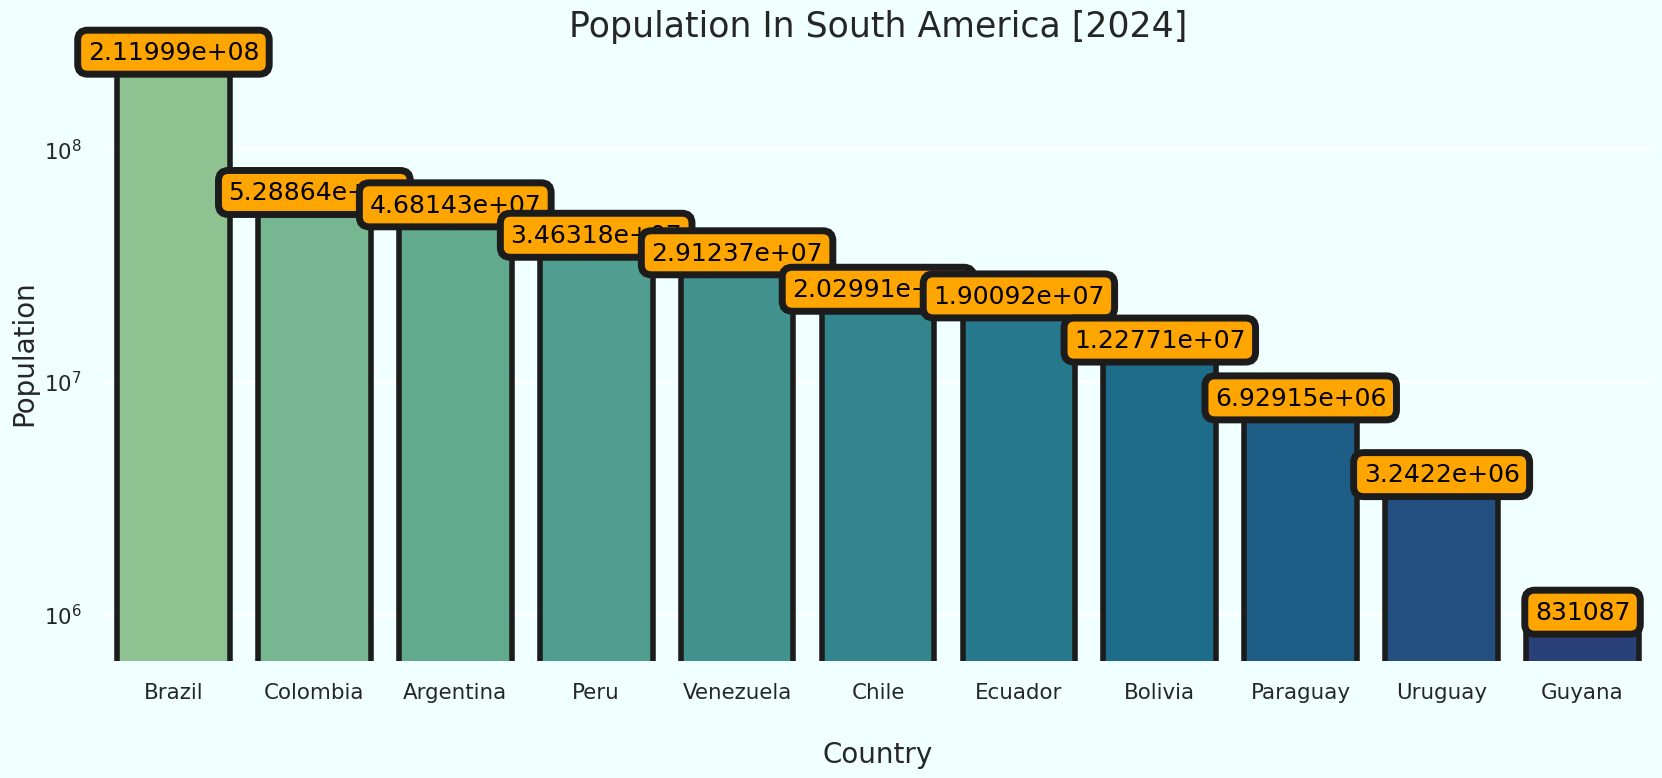

In [ ]:
print("Population in South America in 2024 :")
plt.subplots(figsize=(20,8))
p=sns.barplot(data=data[data["continent"]=="South America"],x="country", y="2024 population",order=data[data["continent"]=="South America"].sort_values("2024 population",ascending=False)["country"][:11],palette=sns.color_palette("crest", 11)[0:11:1], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Population In South America [2024]",fontsize=25)
p.set_xlabel("\nCountry",fontsize=20)
p.set_ylabel("Population",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the timeline of continent-wise population :


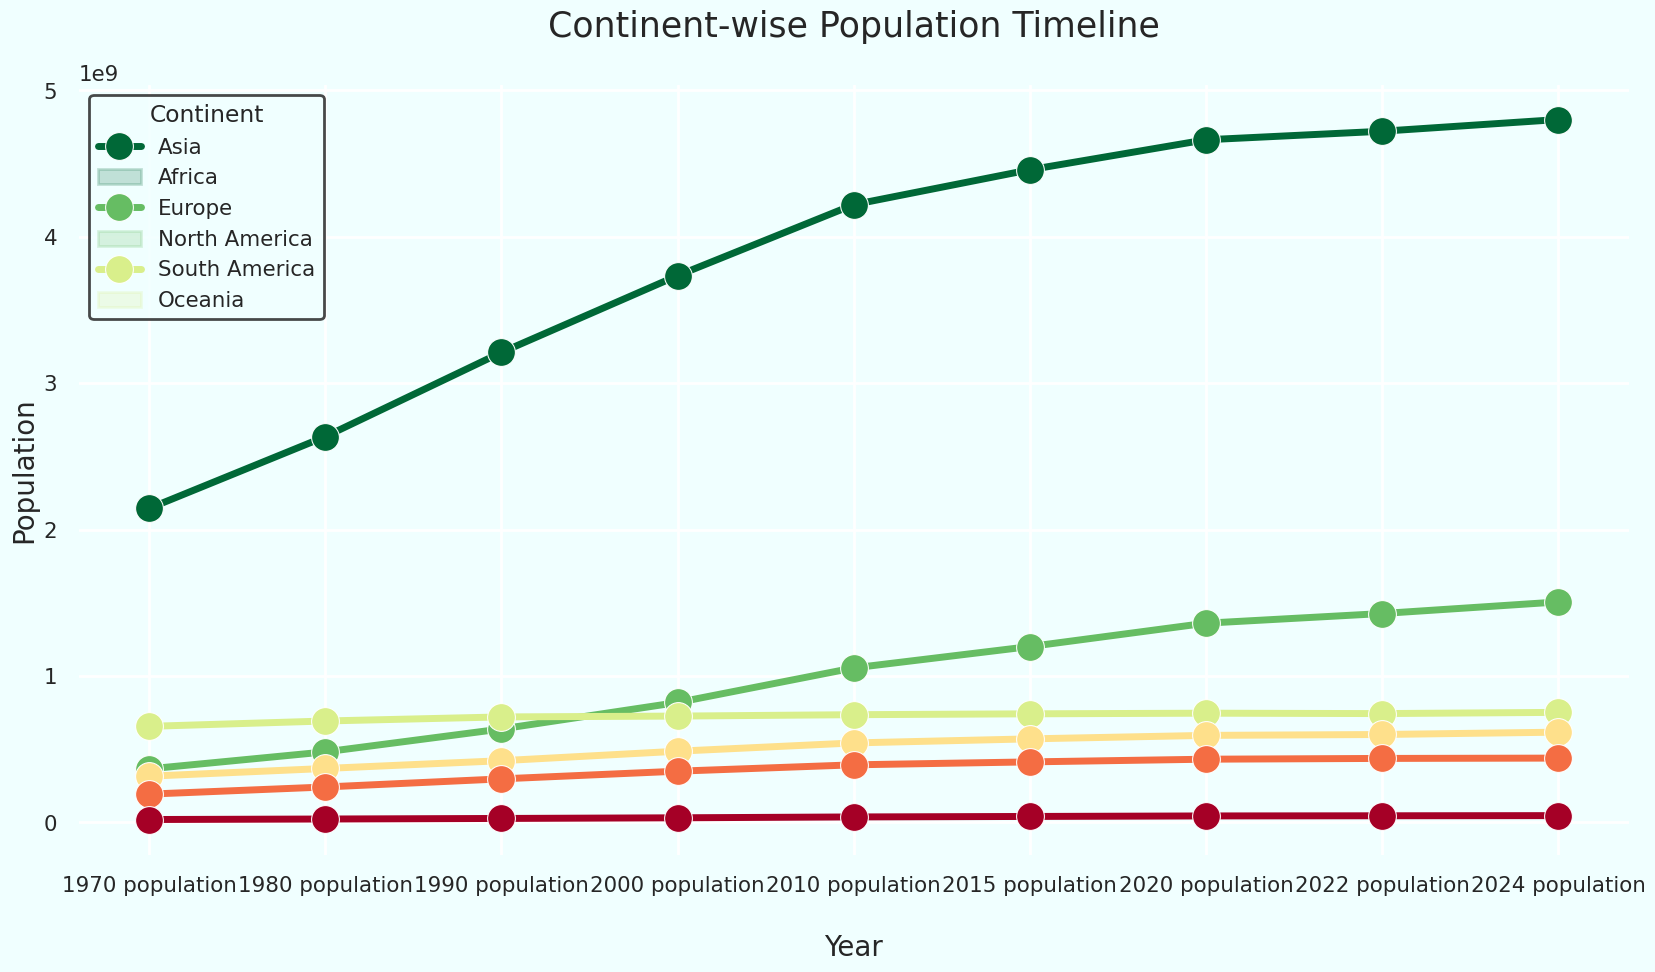

In [ ]:
print(f"Let's have a look on the timeline of continent-wise population :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Asia"],data=data_pop.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Africa"],data=data_pop.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Europe"],data=data_pop.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["North America"],data=data_pop.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["South America"],data=data_pop.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_pop.T.index ,y=data_pop.T["Oceania"],data=data_pop.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")

sns.despine(left=True, bottom=True)
plt.show()

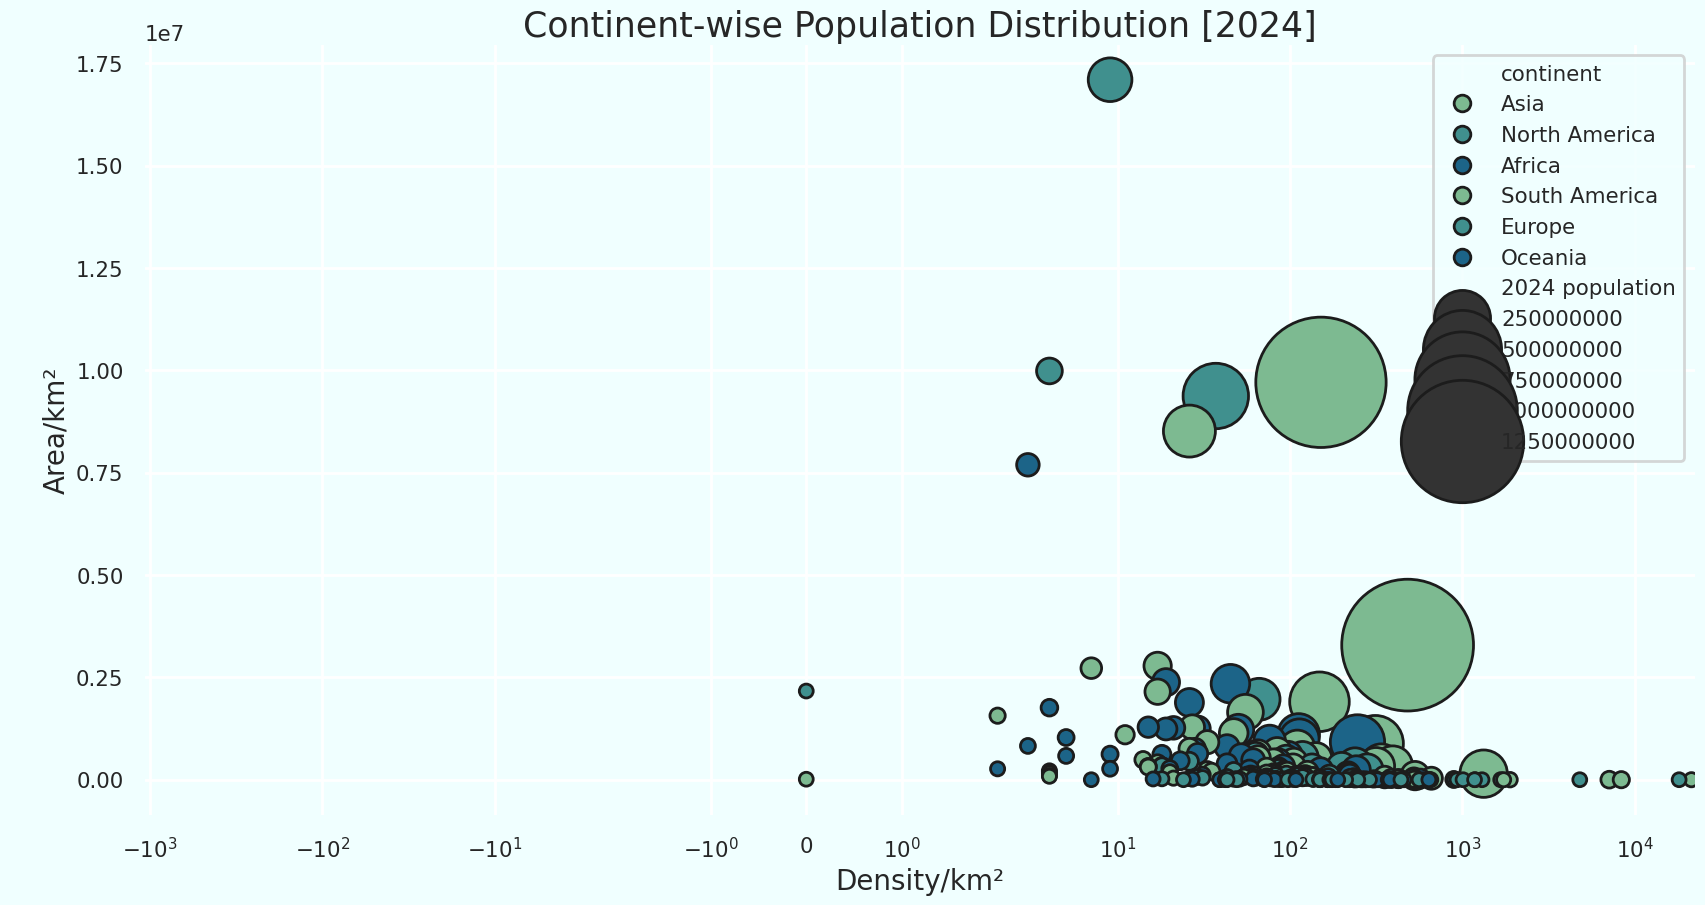

In [ ]:
plt.subplots(figsize=(20,10))
p=sns.scatterplot(x=data["density (km²)"], y=data["area (km²)"], hue=data["continent"],size=data["2024 population"],palette=sns.color_palette("crest")[0:11:2], edgecolor = "#1c1c1c", linewidth = 2,sizes=(100, 9000),alpha=1)
p.set_xscale("symlog")
p.set_yscale("linear")
p.set_title("Continent-wise Population Distribution [2024]",fontsize=25)
p.set_xlabel("Density/km²",fontsize=20)
p.set_ylabel("\nArea/km²",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the distribution of population density :


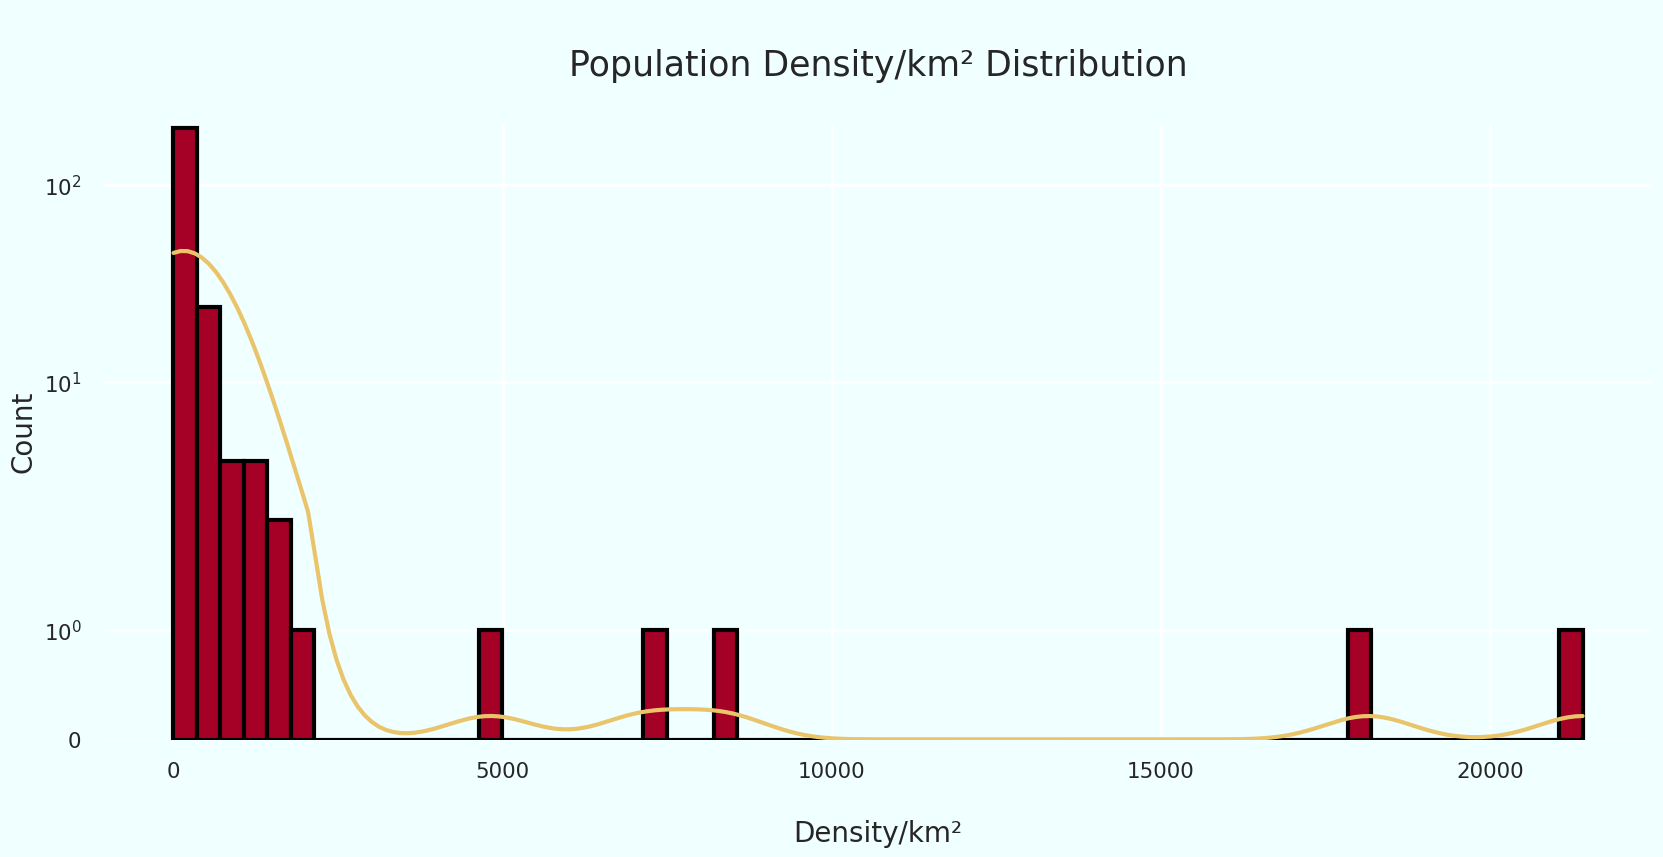

In [ ]:
print(f"Let's have a look on the distribution of population density :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data["density (km²)"],color="#A50026",kde=True,bins=60,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.lines[0].set_color("#e9c46a")
p.axes.set_yscale("symlog")
p.axes.set_title("\nPopulation Density/km² Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nDensity/km²",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

Let's have a look on the population density :


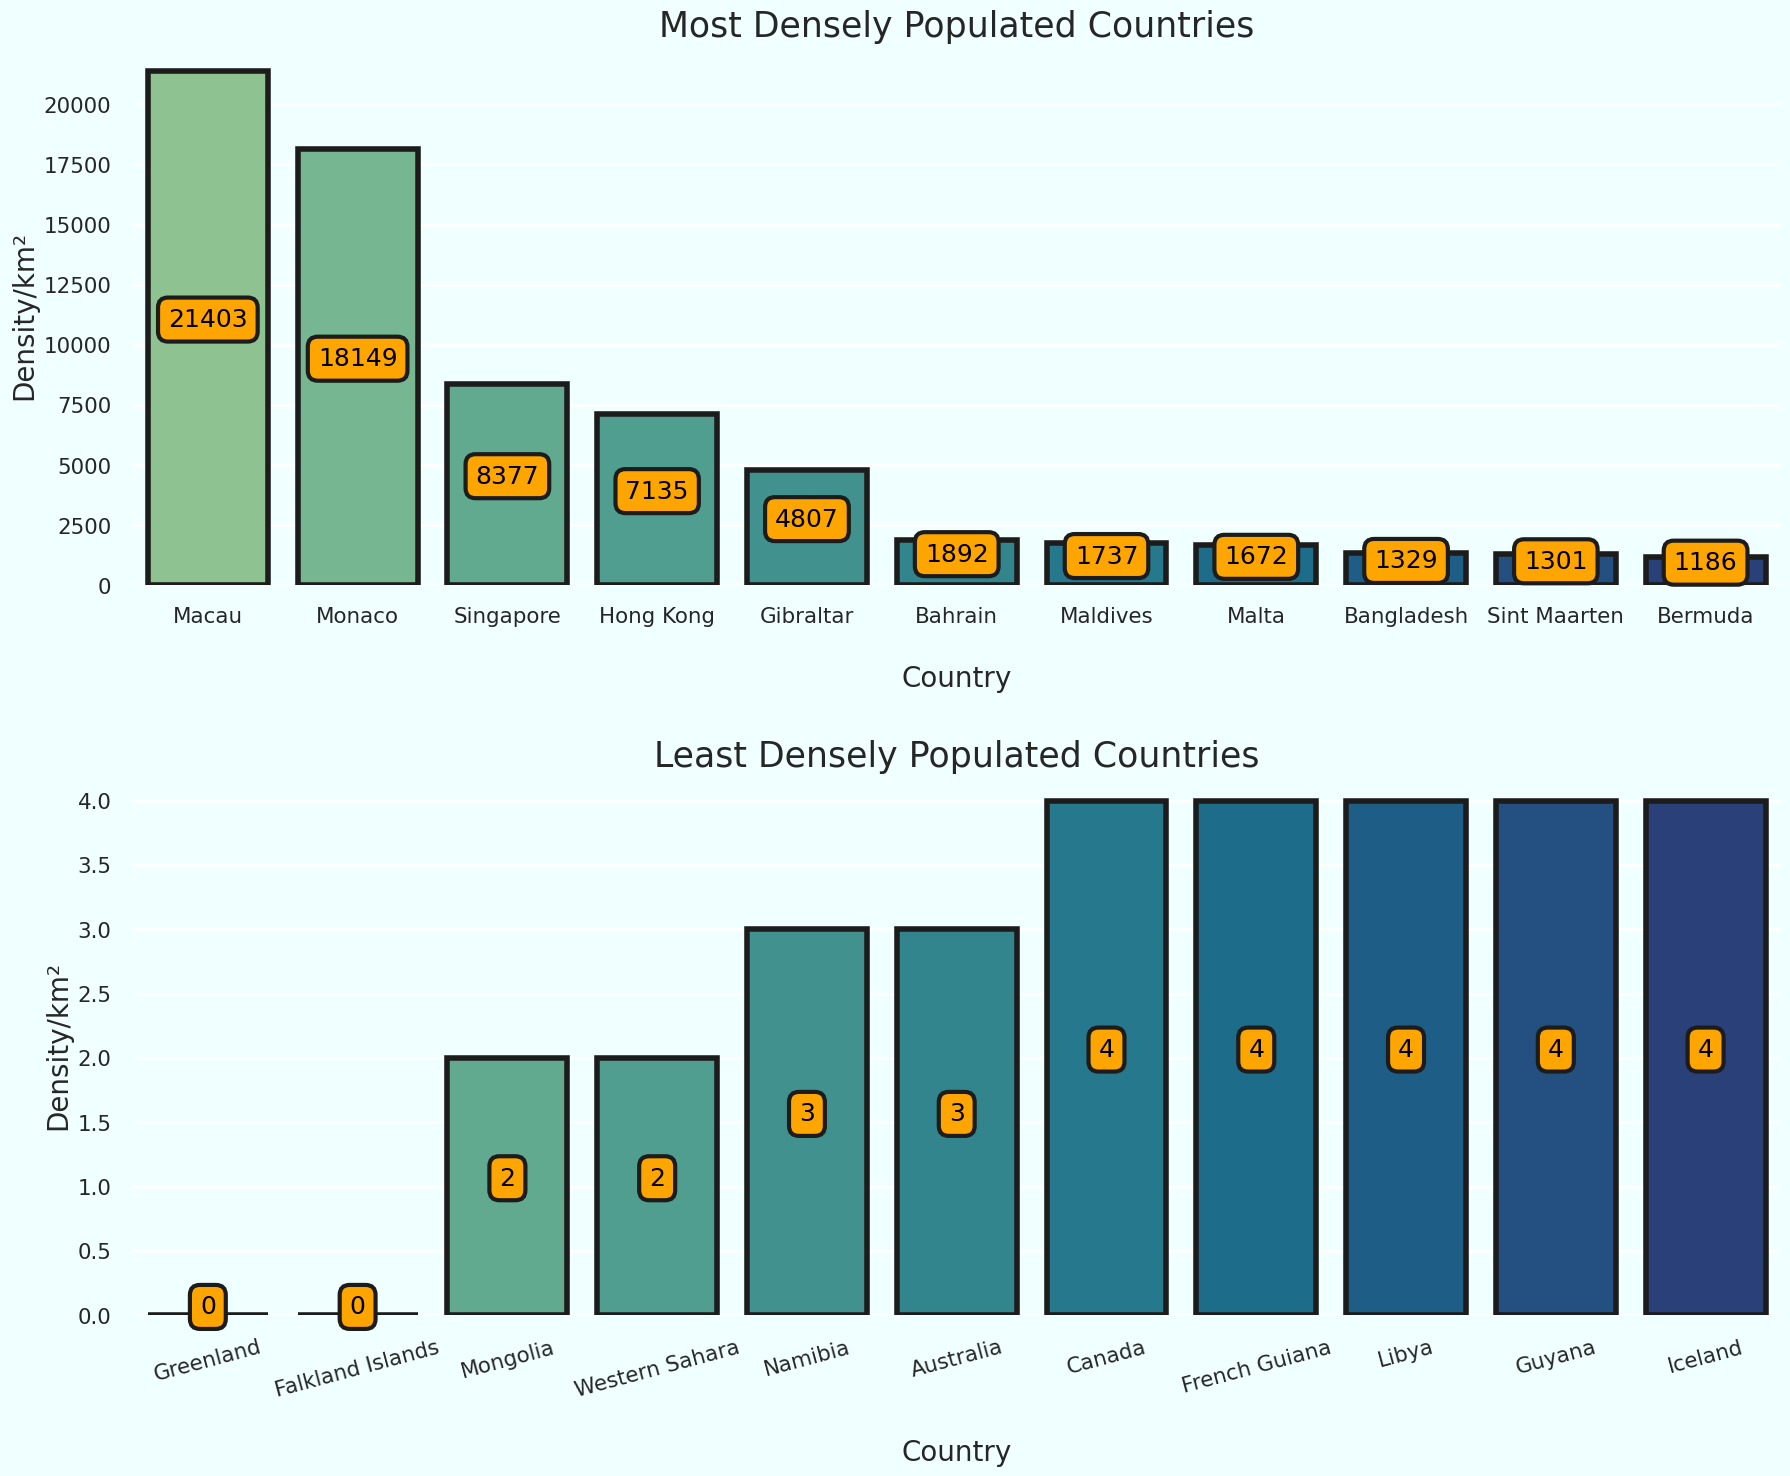

In [ ]:
print(f"Let's have a look on the population density :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=data["country"],y=data["density (km²)"],order=data.sort_values("density (km²)",ascending=False)["country"][:11],ax=axs[0],palette=sns.color_palette("crest", 11), saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Most Densely Populated Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Density/km²",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=data["country"],y=data["density (km²)"],order=data.sort_values("density (km²)",ascending=True)["country"][:11],ax=axs[1],palette=sns.color_palette("crest", 11), saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Densely Populated Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Density/km²",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 15)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the timeline of continent-wise population density :


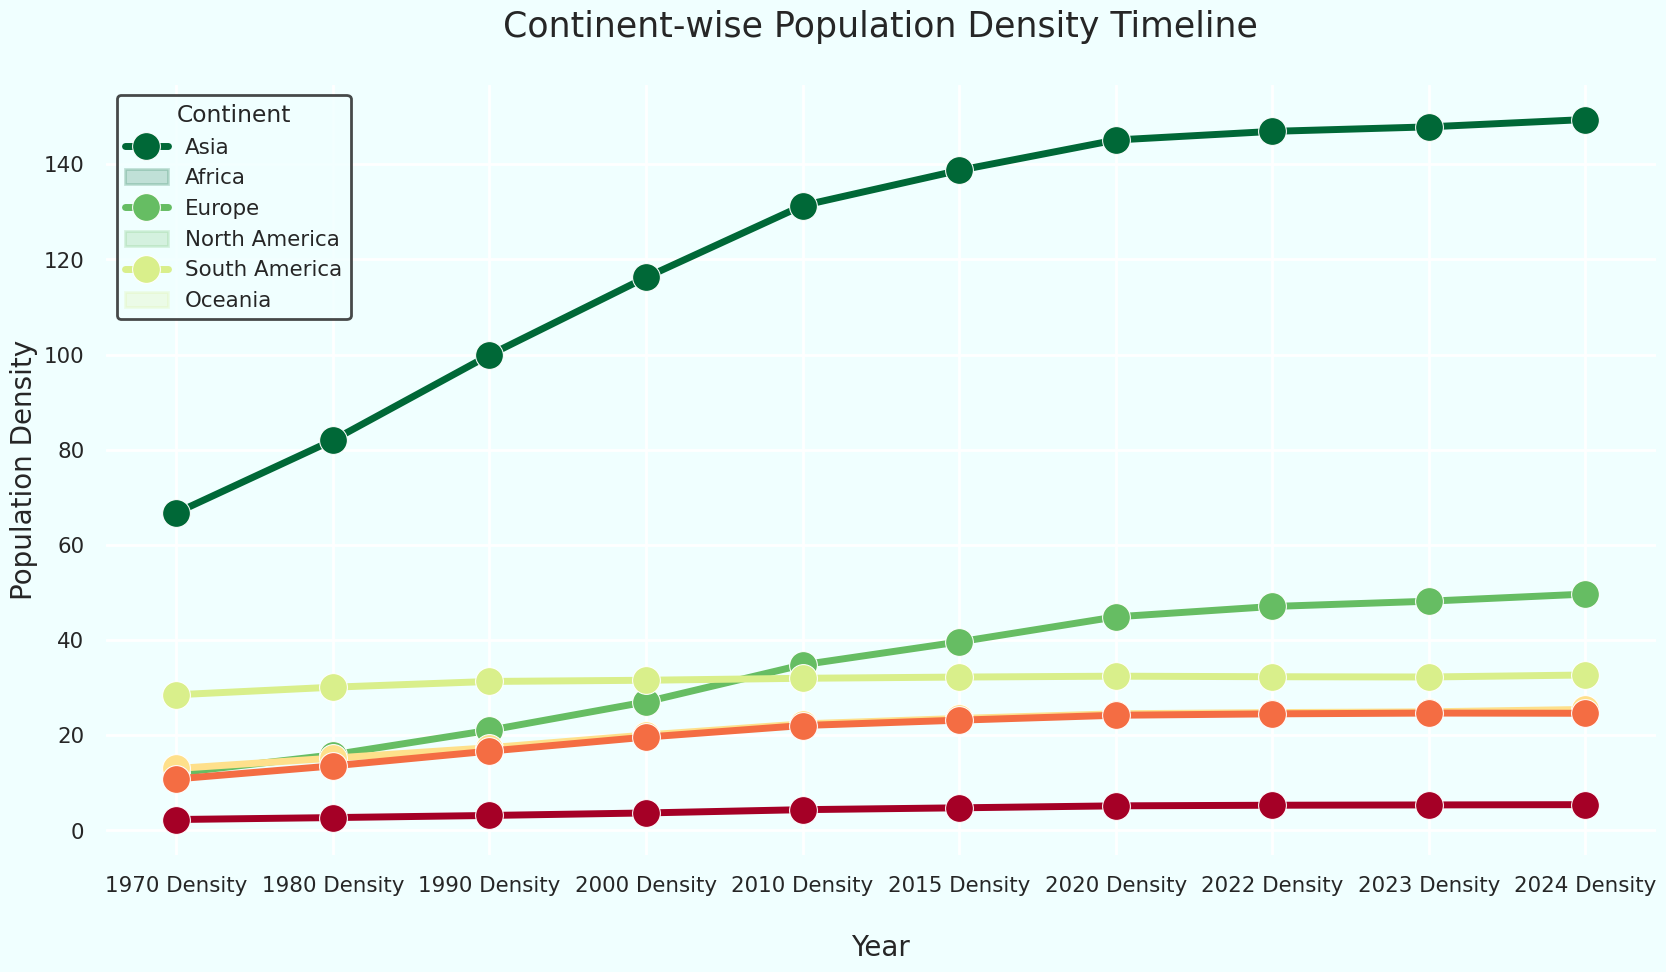

In [ ]:
data_den = data.copy()
data_den = pd.DataFrame(data_den.groupby(["continent"])[["1970 population","1980 population","1990 population","2000 population","2010 population","2015 population","2020 population","2022 population","2023 population", "2024 population","area (km²)"]].sum())
col = ["1970 population","1980 population","1990 population","2000 population","2010 population","2015 population","2020 population","2022 population", "2023 population", "2024 population"]
for i in col:
    data_den[i] = data_den[i]/data_den["area (km²)"]
data_den.rename(columns={"1970 population":"1970 Density","1980 population":"1980 Density","1990 population":"1990 Density","2000 population":"2000 Density","2010 population":"2010 Density","2015 population":"2015 Density","2020 population":"2020 Density","2022 population":"2022 Density", "2023 population":"2023 Density", "2024 population":"2024 Density"},inplace=True)
data_den.drop(columns="area (km²)",inplace=True)


print(f"Let's have a look on the timeline of continent-wise population density :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_den.T.index ,y=data_den.T["Asia"],data=data_den.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Africa"],data=data_den.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Europe"],data=data_den.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["North America"],data=data_den.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["South America"],data=data_den.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Oceania"],data=data_den.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Continent-wise Population Density Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population Density",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the population growth rate :


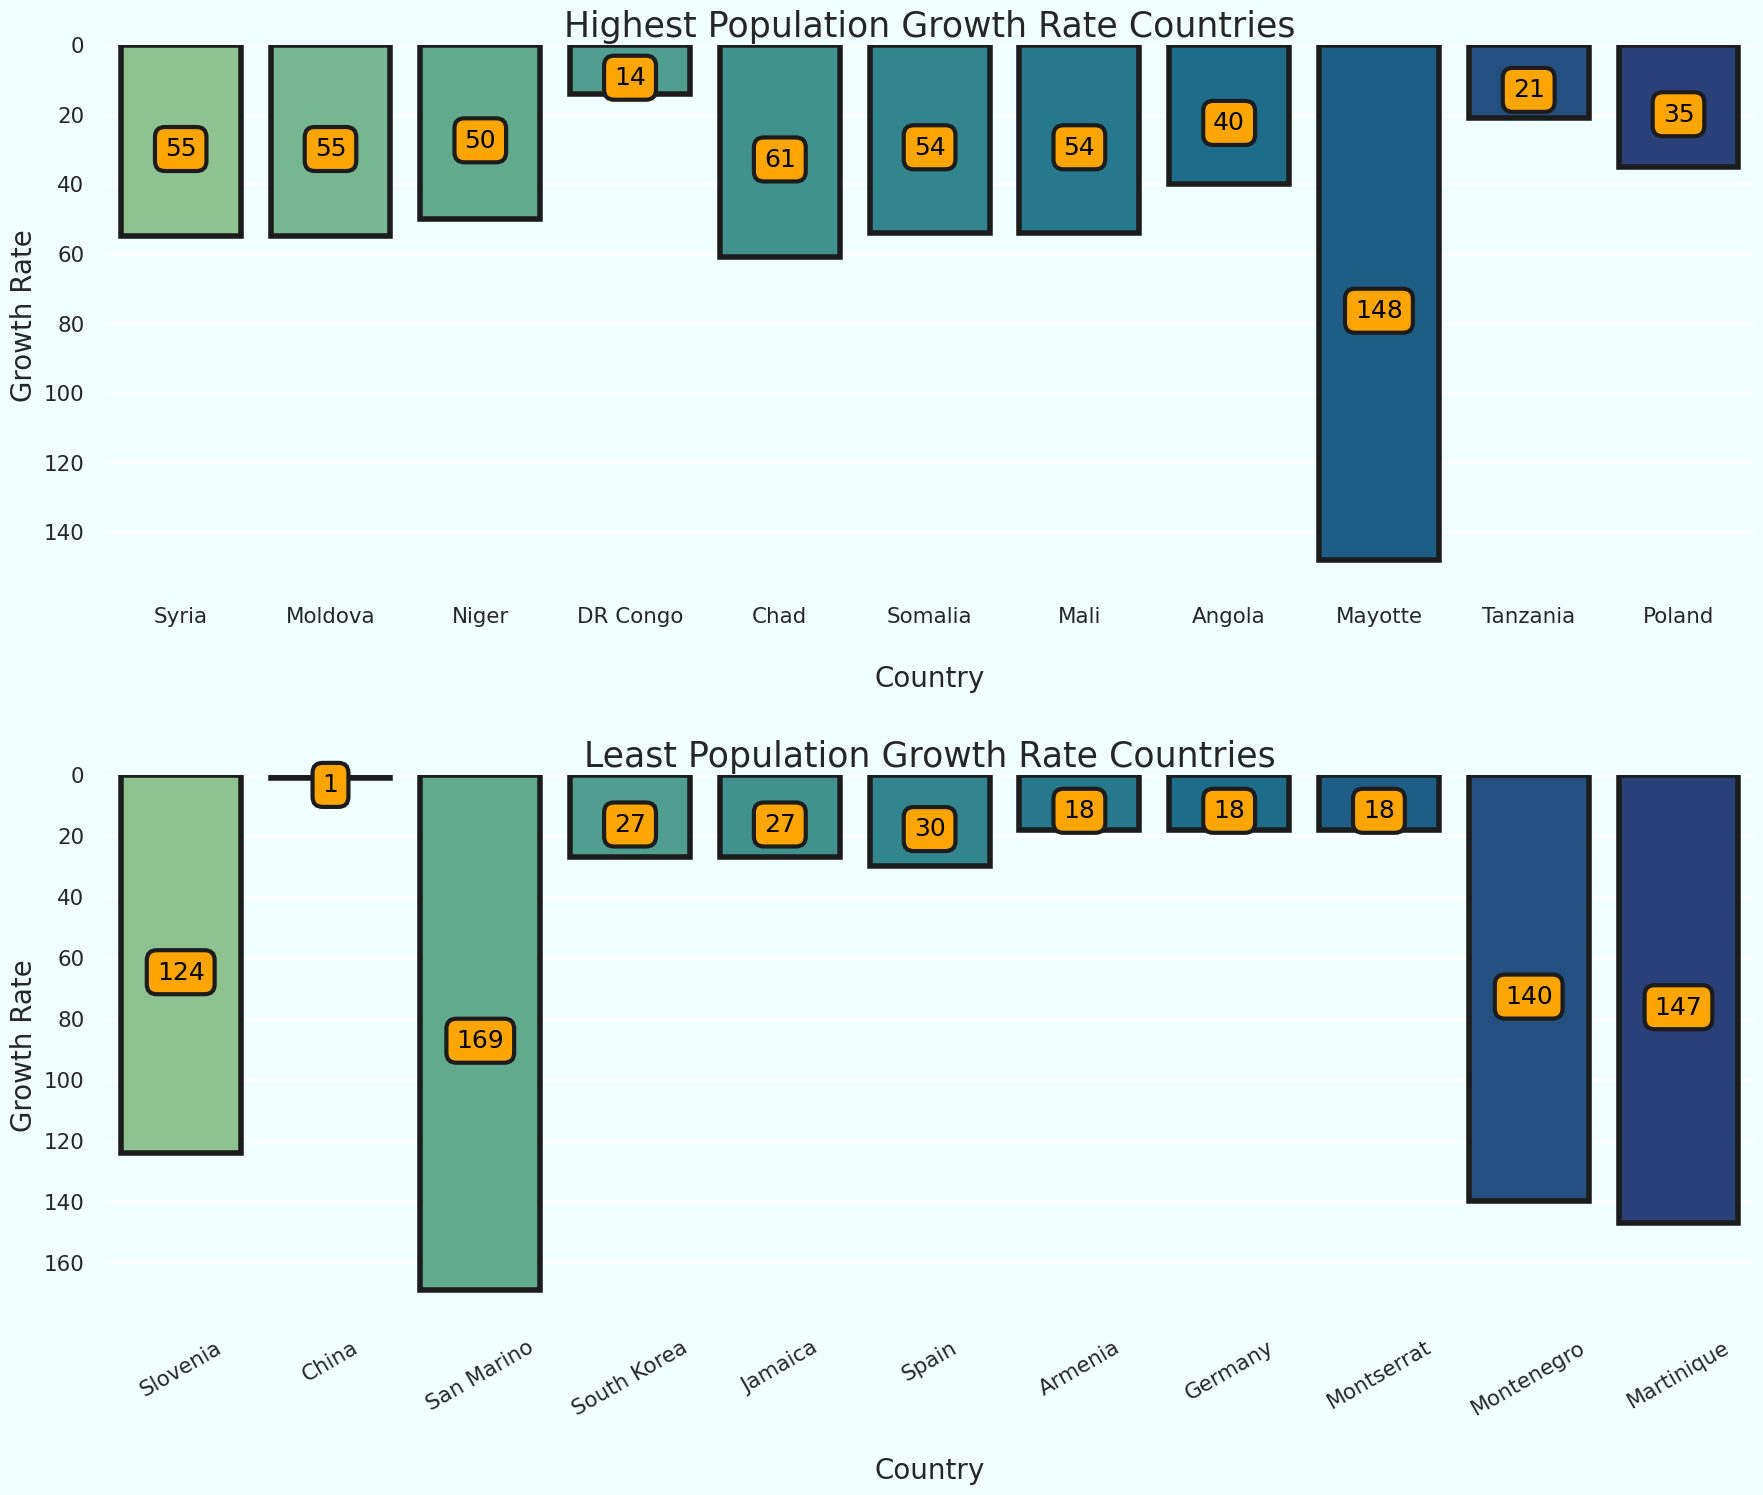

In [ ]:
print(f"Let's have a look on the population growth rate :")
_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=data["country"],y=data["growth rate"],order=data.sort_values("growth rate",ascending=False)["country"][:11],ax=axs[0],palette=sns.color_palette("crest", 11), saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[0].set_yscale("linear")
axs[0].set_title("Highest Population Growth Rate Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Growth Rate",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=data["country"],y=data["growth rate"],order=data.sort_values("growth rate",ascending=True)["country"][:11],ax=axs[1],palette=sns.color_palette("crest", 11), saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
axs[1].set_yscale("linear")
axs[1].set_title("Least Population Growth Rate Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Growth Rate",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 30)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the continent-wise average population growth rate :


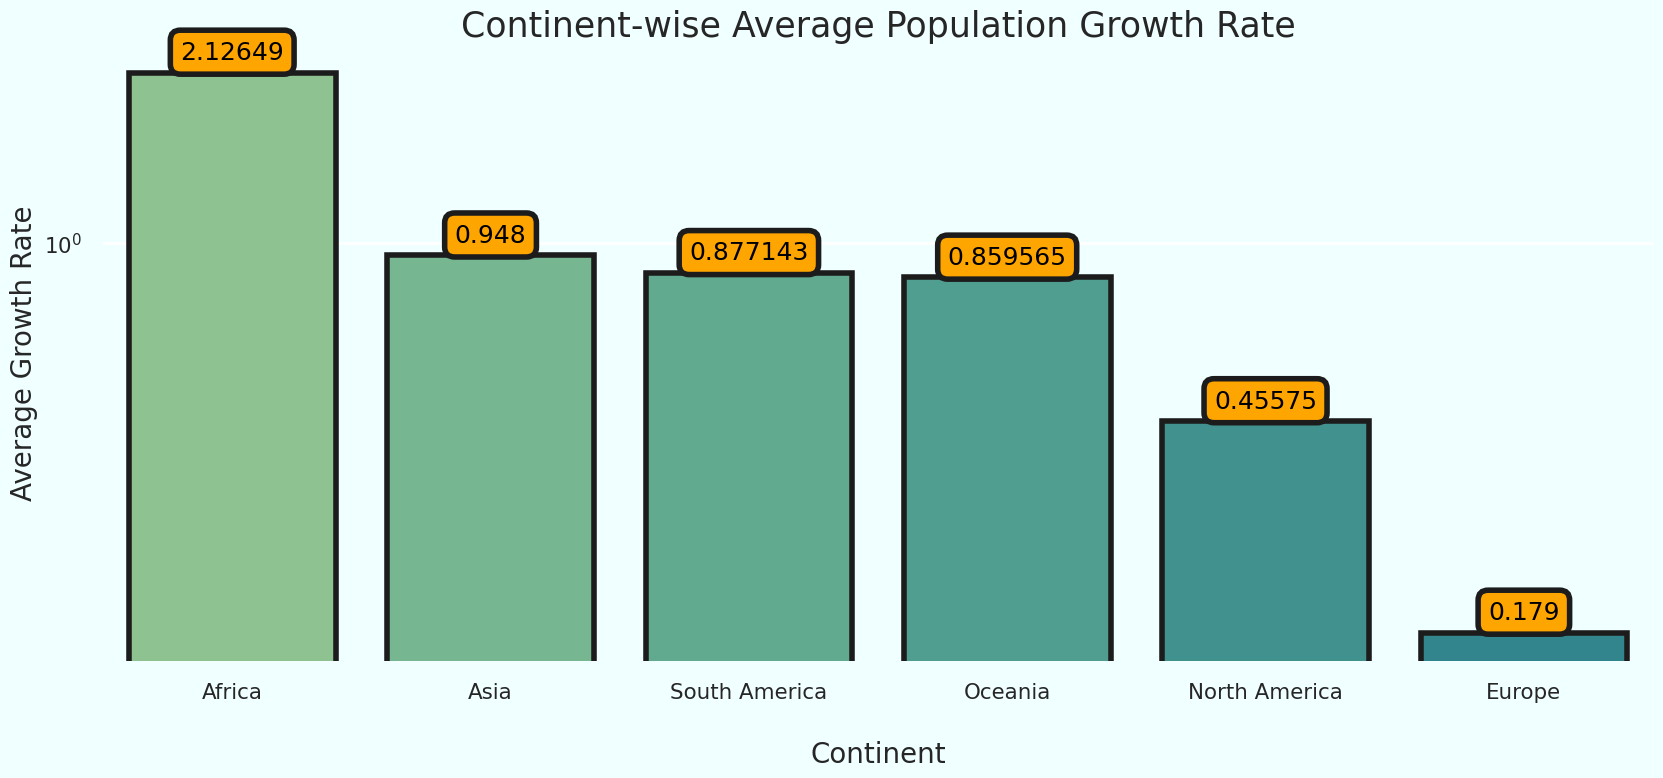

In [ ]:
data_gr = data.copy()

data_gr['growth rate'] = data_gr['growth rate'].str.rstrip('%').astype(float)

data_gr = pd.DataFrame(data_gr.groupby(["continent"])["growth rate"].mean())
print("Let's have a look on the continent-wise average population growth rate :")
plt.subplots(figsize=(20,8))
p=sns.barplot(x=data_gr.index, y=data_gr["growth rate"],order=data_gr.sort_values("growth rate",ascending=False).index,palette=sns.color_palette("crest", 11)[0:11:1], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.set_yscale("log")
p.set_title("Continent-wise Average Population Growth Rate",fontsize=25)
p.set_xlabel("\nContinent",fontsize=20)
p.set_ylabel("Average Growth Rate",fontsize=20)
p.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=18,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()